<h1><b>A Correlational Study of Students Mental Health based on Genealogical Factors</b></h1>


A. Importing Libraries and Dataset

In [ ]:
#Importing python libraries
from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Importing dataset
df = pd.read_csv("PREDANA-FINALS-DATASET.csv")

B. Describing the Data

In [ ]:
#Checking the shape of the data
df.shape

(52, 25)

In [ ]:
#Checking the types of attributes of the data
df.dtypes

AGE                          int64
GENDER                      object
COURSE                      object
YEAR                         int64
CITY                        object
FAMILY STATUS               object
MOTHER'S EDUCATION          object
FATHER'S EDUCATION          object
MONTHLY INCOME              object
MENTAL DISORDER HISTORY     object
Q1                           int64
Q2                           int64
Q3                           int64
Q4                           int64
Q5                           int64
Q6                           int64
Q7                          object
Q8                          object
Q9                          object
Q10                         object
Q11                         object
Q12                         object
Q13                          int64
Q14                          int64
Mental State               float64
dtype: object

In [ ]:
#Checking the dataframe
df.head(10)

,AGE,GENDER,COURSE,YEAR,CITY,FAMILY STATUS,MOTHER'S EDUCATION,FATHER'S EDUCATION,MONTHLY INCOME,MENTAL DISORDER HISTORY,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Mental State
0,21,M,Data Science,3,Makati,Complete,College,College,"More than 50,000",No,...,3,Few weeks ago,Few weeks ago,No,No,Yes,No,3,3,2.750
1,21,F,Psychology,3,Pasay,Complete,High School,High School,"More than 50,000",No,...,3,I don't remember,I don't remember,Not sure,Yes,Yes,Yes,4,3,2.625
2,23,M,Animation Tech,2,Cavite,Deceased,Elementary,Elementary,"Less than 10,000",No,...,3,Few days ago,Few days ago,No,Yes,Yes,No,1,3,2.500
3,20,F,Accountancy,3,Manila,Complete,College,Elementary,"Less than 10,000",No,...,4,Few days ago,Few days ago,Yes,Yes,No,Yes,4,2,2.375
4,21,F,Nursing,3,Makati,Deceased,High School,College,"10,000 to 15,000",No,...,2,I don't remember,I don't remember,No,Yes,Yes,No,4,2,2.375
5,21,M,Civil Engineering,3,Manila,Separated,High School,High School,"More than 50,000",No,...,3,Few years ago,Few weeks ago,No,Yes,No,No,4,3,2.625
6,21,F,Accounting,3,Bicol,Complete,College,College,"35,000 to 40,000",No,...,3,Few days ago,Few years ago,No,Yes,Yes,No,3,3,2.500
7,21,F,Data Science,3,Pasay,Complete,High School,College,"10,000 to 15,000",No,...,3,Few years ago,Few months ago,No,Yes,Yes,No,3,3,2.500
8,21,M,Architecture,3,Camarines Sur,Separated,College,College,"More than 50,000",Yes,...,4,Few weeks ago,Few weeks ago,No,Yes,No,Yes,3,3,2.625
9,20,F,Computer Science,2,Makati,Complete,High School,High School,"Less than 10,000",No,...,3,Few weeks ago,Few days ago,No,No,Yes,No,4,3,2.875


In [ ]:
#describing the statistical components of the data
df.describe()

,AGE,YEAR,Q1,Q2,Q3,Q4,Q5,Q6,Q13,Q14,Mental State
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.673077,3.807692,2.903846,3.211538,2.230769,2.192308,2.519231,2.903846,3.038462,2.461538,2.682692
std,1.745820,2.619972,1.124759,1.016270,1.059326,0.990909,1.075400,0.913077,0.948922,0.778675,0.418961
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000
25%,20.750000,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.750000,3.000000,2.000000,2.375000
50%,21.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.500000,3.000000,3.000000,3.000000,2.625000
75%,21.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.906250
max,26.000000,12.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.750000


C. Data Preprocessing

In [ ]:
#Rechecking the data after dropping null values
df.isnull().sum()

AGE                        0
GENDER                     0
COURSE                     0
YEAR                       0
CITY                       0
FAMILY STATUS              0
MOTHER'S EDUCATION         0
FATHER'S EDUCATION         0
MONTHLY INCOME             0
MENTAL DISORDER HISTORY    0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q6                         0
Q7                         0
Q8                         0
Q9                         0
Q10                        0
Q11                        0
Q12                        0
Q13                        0
Q14                        0
Mental State               0
dtype: int64

In [ ]:
#Dropping null values and replacing infinity values
import numpy as np
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
df.head(5)

,AGE,GENDER,COURSE,YEAR,CITY,FAMILY STATUS,MOTHER'S EDUCATION,FATHER'S EDUCATION,MONTHLY INCOME,MENTAL DISORDER HISTORY,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Mental State
0,21,M,Data Science,3,Makati,Complete,College,College,"More than 50,000",No,...,3,Few weeks ago,Few weeks ago,No,No,Yes,No,3,3,2.75
1,21,F,Psychology,3,Pasay,Complete,High School,High School,"More than 50,000",No,...,3,I don't remember,I don't remember,Not sure,Yes,Yes,Yes,4,3,2.62
2,23,M,Animation Tech,2,Cavite,Deceased,Elementary,Elementary,"Less than 10,000",No,...,3,Few days ago,Few days ago,No,Yes,Yes,No,1,3,2.50
3,20,F,Accountancy,3,Manila,Complete,College,Elementary,"Less than 10,000",No,...,4,Few days ago,Few days ago,Yes,Yes,No,Yes,4,2,2.38
4,21,F,Nursing,3,Makati,Deceased,High School,College,"10,000 to 15,000",No,...,2,I don't remember,I don't remember,No,Yes,Yes,No,4,2,2.38


In [ ]:
#Transforming the categorical attributes into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['GENDER'] = le.fit_transform(df['GENDER'])
df['GENDER'].unique()
df['COURSE'] = le.fit_transform(df['COURSE'])
df['COURSE'].unique()
df['CITY'] = le.fit_transform(df['CITY'])
df['CITY'].unique()
df['FAMILY STATUS'] = le.fit_transform(df['FAMILY STATUS'])
df['FAMILY STATUS'].unique()
df["MOTHER'S EDUCATION"] = le.fit_transform(df["MOTHER'S EDUCATION"])
df["MOTHER'S EDUCATION"].unique()
df["FATHER'S EDUCATION"] = le.fit_transform(df["FATHER'S EDUCATION"])
df["FATHER'S EDUCATION"].unique()
df["MONTHLY INCOME"] = le.fit_transform(df["MONTHLY INCOME"])
df["MONTHLY INCOME"].unique()
df["MENTAL DISORDER HISTORY"] = le.fit_transform(df["MENTAL DISORDER HISTORY"])
df["MENTAL DISORDER HISTORY"].unique()
df["Q7"] = le.fit_transform(df["Q7"])
df["Q7"].unique()
df["Q8"] = le.fit_transform(df["Q8"])
df["Q8"].unique()
df["Q9"] = le.fit_transform(df["Q9"])
df["Q9"].unique()
df["Q10"] = le.fit_transform(df["Q10"])
df["Q10"].unique()
df["Q11"] = le.fit_transform(df["Q11"])
df["Q11"].unique()
df["Q12"] = le.fit_transform(df["Q12"])
df["Q12"].unique()

array([0, 1])

In [ ]:
#rounding off the dataset into nearest tenths
df = df.round(2)

In [ ]:
#Rechecking the dataframe
df.head(5)

,AGE,GENDER,COURSE,YEAR,CITY,FAMILY STATUS,MOTHER'S EDUCATION,FATHER'S EDUCATION,MONTHLY INCOME,MENTAL DISORDER HISTORY,...,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Mental State
0,21,1,11,3,6,0,0,0,7,0,...,3,2,2,0,0,2,0,3,3,2.75
1,21,0,24,3,10,0,2,2,7,0,...,3,4,4,1,2,2,1,4,3,2.62
2,23,1,2,2,4,1,1,1,6,0,...,3,0,0,0,2,2,0,1,3,2.50
3,20,0,0,3,8,0,0,1,6,0,...,4,0,0,2,2,1,1,4,2,2.38
4,21,0,21,3,6,1,2,0,0,0,...,2,4,4,0,2,2,0,4,2,2.38


D. Visualization of the Data

SCATTER PLOT

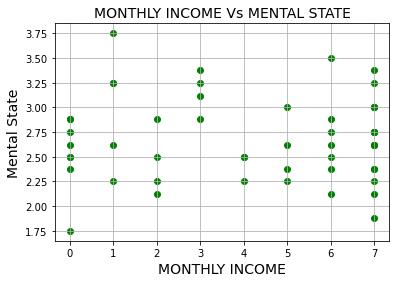

In [ ]:
plt.scatter(df['MONTHLY INCOME'], df['Mental State'], color='green')
plt.title('MONTHLY INCOME Vs MENTAL STATE', fontsize=14)
plt.xlabel('MONTHLY INCOME', fontsize=14)
plt.ylabel('Mental State', fontsize=14)
plt.grid(True)
plt.show()

HISTOGRAM

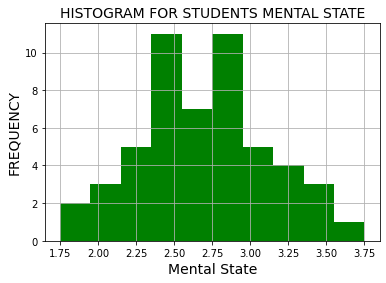

In [ ]:
plt.hist(df['Mental State'], bins=10, color='green')
plt.title('HISTOGRAM FOR STUDENTS MENTAL STATE', fontsize=14)
plt.xlabel('Mental State', fontsize=14)
plt.ylabel('FREQUENCY', fontsize=14)
plt.grid(True)
plt.show()

JOINT PLOT

D. Setting the values for independent (X) variable and dependent (Y) variable

In [ ]:
#assigning x and y
x = df[['AGE','GENDER','COURSE','YEAR','CITY','FAMILY STATUS', "MOTHER'S EDUCATION", "FATHER'S EDUCATION", "MONTHLY INCOME",
        "MENTAL DISORDER HISTORY", "Q7", "Q8", "Q9", "Q11", "Q12",]]
y = df['Mental State']

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

E. Implementation of Model




In [ ]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x, y)

LinearRegression()

In [ ]:
#Model Prediction
y_pred_mlr = mlr.predict(X_test)

In [ ]:
#intercept and coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.4188995602553178
Coefficients:


[('AGE', 0.08121747605100456),
 ('GENDER', -0.03368757489218768),
 ('COURSE', -0.012367008745163229),
 ('YEAR', 0.07684833288567976),
 ('CITY', 0.012312202635868942),
 ('FAMILY STATUS', 0.04457539142472538),
 ("MOTHER'S EDUCATION", -0.059199997818227997),
 ("FATHER'S EDUCATION", 0.007140059826426816),
 ('MONTHLY INCOME', -0.012234174471335763),
 ('MENTAL DISORDER HISTORY', 0.12195598169458012),
 ('Q7', 0.076780629843191),
 ('Q8', 0.021652533266664113),
 ('Q9', 0.20870911288314356),
 ('Q11', 0.1843461717966583),
 ('Q12', -0.16144828574682024)]

In [ ]:
#prediction of test set
y_pred_mlr= mlr.predict(X_test)
#predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [2.66466479 2.65286699 2.8348592  2.59458978 2.71922814 2.45021723
 2.95280561 2.92505186 2.23141456 2.85777798 2.36210434 2.56628261
 2.80566141 2.69563909 2.96599102 2.4682976 ]


In [ ]:
#Getting p-value per attribute
import statsmodels.api as sm
mod = sm.OLS(y,x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

AGE                        0.000012
GENDER                     0.783764
COURSE                     0.241630
YEAR                       0.006366
CITY                       0.412038
FAMILY STATUS              0.650119
MOTHER'S EDUCATION         0.490855
FATHER'S EDUCATION         0.911118
MONTHLY INCOME             0.614351
MENTAL DISORDER HISTORY    0.623064
Q7                         0.260556
Q8                         0.767195
Q9                         0.231468
Q11                        0.276669
Q12                        0.416867
Name: P>|t|, dtype: float64


In [ ]:
#actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
28,2.75,2.664665
37,2.38,2.652867
11,2.38,2.834859
34,3.00,2.594590
2,2.50,2.719228


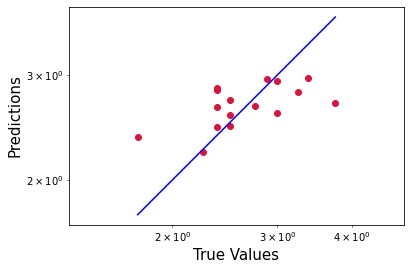

In [ ]:
#Plotting the model
plt.scatter(y_test, y_pred_mlr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_mlr), max(y_test))
p2 = min(min(y_pred_mlr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

F. Implementation of Feature Importance

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mlr.coef_[10]
})
importances = importances.sort_values(by='Importance', ascending=False)

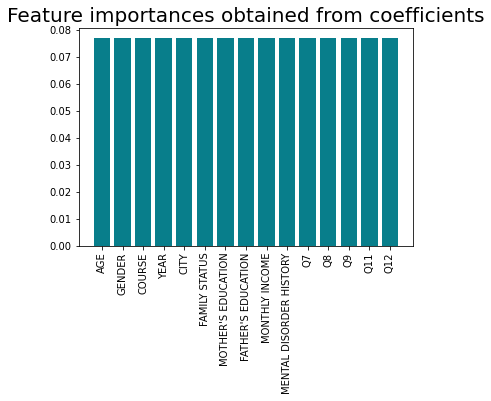

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

G. Evaluation of the Model

In [ ]:
#model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 17.19
Mean Absolute Error: 0.29842699982878784
Mean Square Error: 0.16288166672157517
Root Mean Square Error: 0.40358600907560604


<h1>ANALYSIS:</h1>

<b>Ho: There is a significant correlation between mental health of students and their family background.

Ha: There is no correlation between mental health of students and their family background.</b>

In this particular study, the main objective is to determine if there is a correlation between mental health of students and their family background. To achieve this, proponents utilized Multiple Linear Regression as the model to be fed by the dataset acquired from a questionnaire answered by students that belong to different socio-demographic groups. To begin the process, proponents then assigned the variable Mental State of the survey as the dependent variable and the rest as independent variables. To identify if the model is reliable, we used different measures of accuracy for evaluation.

For the conclusion of the study, researchers found out that that family genealogy plays a contributing factor for student's mental health. Based on the p-value, it is observed that out of all the variables assigned as independent, Age and Year exhibits a value lower than 0.05. Which then leads the proponents to reject the alternative hypothesis and accept the null hypothesis - There is a significant correlation between mental health of students and their family background. As it was shown above, the predicted value is not consistent to the actual value. Meaning to say, student's mental health will either improve or worsen based on the condition of their family situation.
